Iteration 1
  Gradient: [ 1. -1.]
  Step size (alpha): 1.0
  New point: [-1.  1.]
----------
Iteration 2
  Gradient: [-1. -1.]
  Step size (alpha): 0.20000000000179846
  New point: [-0.8  1.2]
----------
Iteration 3
  Gradient: [ 0.2 -0.2]
  Step size (alpha): 0.99999998519
  New point: [-1.   1.4]
----------
Iteration 4
  Gradient: [-0.19999999 -0.2       ]
  Step size (alpha): 0.1999999788061522
  New point: [-0.96        1.43999999]
----------
Iteration 5
  Gradient: [ 0.03999998 -0.04000002]
  Step size (alpha): 1.000000948537682
  New point: [-1.00000002  1.48000005]
----------
Iteration 6
  Gradient: [-0.03999996 -0.03999993]
  Step size (alpha): 0.19999996771668674
  New point: [-0.99200002  1.48800004]
----------
Iteration 7
  Gradient: [ 0.00799997 -0.00799998]
  Step size (alpha): 0.9999994654635972
  New point: [-0.99999999  1.49600001]
----------
Iteration 8
  Gradient: [-0.00799995 -0.00799997]
  Step size (alpha): 0.20000012293156236
  New point: [-0.9984  1.4976]
-------

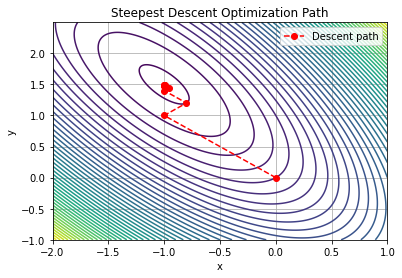

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Function to be minimized
def f(x):
    return x[0] - x[1] + 2*x[0]**2 + 2*x[0]*x[1] + x[1]**2

# Numerical gradient approximation
def gradient(f, x, eps=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += eps
        x2[i] -= eps
        grad[i] = (f(x1) - f(x2)) / (2 * eps)
    return grad

# Steepest descent method with line search
def compute_steepest_descent(f, x0, tol=0.01, max_iter=1000):
    x = np.array(x0, dtype=float)
    x_history = [x.copy()]

    for i in range(max_iter):
        grad_val = gradient(f, x)
        if np.linalg.norm(grad_val) < tol:
            print("Gradient norm below tolerance. Converged.")
            break

        direction = -grad_val
        f_alpha = lambda alpha: f(x + alpha * direction)
        alpha_opt = minimize_scalar(f_alpha).x

        x = x + alpha_opt * direction
        x_history.append(x.copy())

        print(f"Iteration {i+1}")
        print("  Gradient:", grad_val)
        print("  Step size (alpha):", alpha_opt)
        print("  New point:", x)
        print("----------")

    return x, f(x), x_history

# Plotting function for the optimization path
def plot_steepest_descent(x_history):
    x_vals = [p[0] for p in x_history]
    y_vals = [p[1] for p in x_history]

    X, Y = np.meshgrid(np.linspace(min(x_vals)-1, max(x_vals)+1, 400),
                       np.linspace(min(y_vals)-1, max(y_vals)+1, 400))
    Z = f([X, Y])

    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.plot(x_vals, y_vals, 'ro--', label='Descent path')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Steepest Descent Optimization Path')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run everything
if __name__ == "__main__":
    x0 = [0, 0]
    x_opt, f_opt, x_history = compute_steepest_descent(f, x0)
    print("Optimal solution:", x_opt)
    print("Optimal value:", f_opt)
    plot_steepest_descent(x_history)


In [5]:
#parallel steepest descent
import numpy as np
from scipy.optimize import minimize_scalar

def f(x):
    return x - 2 * x**2 + x**3  # Example 1D function (modify as needed)

def derivative(f, x, eps=1e-5):
    return (f(x + eps) - f(x - eps)) / (2 * eps)

def steepest_descent_1d(f, x0, tol=1e-6, max_iter=10):
    x = float(x0)
    best_x, best_f = x, f(x)  # Track best solution
    
    for i in range(max_iter):
        grad = derivative(f, x)
        grad = np.clip(grad, -1e3, 1e3)  # Prevent overflow
        
        if abs(grad) < tol:
            print(f"Converged early at iteration {i+1}")
            break
        
        direction = -grad
        f_alpha = lambda alpha: f(x + alpha * direction)
        
        # Constrain alpha to avoid large steps
        alpha_opt = minimize_scalar(f_alpha, bounds=(-1, 1), method='bounded').x  
        x = x + alpha_opt * direction
        
        # Update best solution
        current_f = f(x)
        if current_f < best_f:
            best_x, best_f = x, current_f
        
        print(f"Iter {i+1}: x = {x:.6f}, f(x) = {current_f:.6f}, grad = {grad:.6f}")
    
    print("\n--- Results ---")
    print(f"Best x: {best_x:.6f}")
    print(f"Best f(x): {best_f:.6f}")
    return best_x, best_f

# Run
x_opt, f_opt = steepest_descent_1d(f, x0=2.0)

Iter 1: x = -2.999980, f(x) = -47.999196, grad = 5.000000
Iter 2: x = -42.999377, f(x) = -83244.436075, grad = 39.999558
Iter 3: x = -1042.995357, f(x) = -1136788076.250975, grad = 1000.000000
Iter 4: x = -2042.991337, f(x) = -8535414705.998156, grad = 1000.000000
Iter 5: x = -3042.987317, f(x) = -28195890776.420757, grad = 1000.000000
Iter 6: x = -4042.983297, f(x) = -66118143930.261902, grad = 1000.000000
Iter 7: x = -5042.979278, f(x) = -128302101810.264755, grad = 1000.000000
Iter 8: x = -6042.975258, f(x) = -220747692059.172455, grad = 1000.000000
Iter 9: x = -7042.971238, f(x) = -349454842319.728149, grad = 1000.000000
Iter 10: x = -8042.967218, f(x) = -520423480234.674988, grad = 1000.000000

--- Results ---
Best x: -8042.967218
Best f(x): -520423480234.674988
